<a href="https://colab.research.google.com/github/kitrak-rev/Sentiment-Analysis/blob/main/Model_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
#Mount and access drive
drive.mount('/content/drive',force_remount=True)
print("Change successful.")

Mounted at /content/drive
Change successful.


In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 240 kB 4.8 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=ed8df9d0b44f02ed741478058982083e703ea7a3cca127b6daf990243aff5357
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [ ]:
import pandas as pd
file_path = "drive/MyDrive/inputs/airline_sentiment_analysis.csv"
df = pd.read_csv(file_path, usecols=[1,2],names=['sentiment','text'],index_col=False,skiprows=1)
df.head()

,sentiment,text
0,positive,@VirginAmerica plus you've added commercials t...
1,negative,@VirginAmerica it's really aggressive to blast...
2,negative,@VirginAmerica and it's a really big bad thing...
3,negative,@VirginAmerica seriously would pay $30 a fligh...
4,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [ ]:
import emoji
import re
text = "game is on 🔥 🔥"
pattern=r"@\s[a-zA-Z]*" # this is to cover for places where there is a space next to @ example '@ '
# Using re.sub() function to remove whitespaces

df['text'] = df.apply(lambda row : pd.Series([re.sub(pattern, "",emoji.demojize(row['text'], delimiters=("", "")))]) , axis = 1)

In [ ]:
df.isnull().sum()

sentiment    0
text         0
dtype: int64

Counter({'negative': 9178, 'positive': 2363})


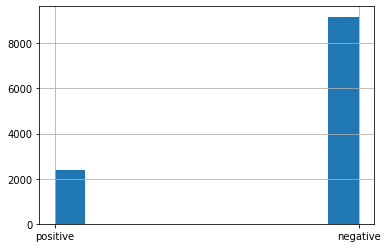

In [ ]:
# positive and negative count
from collections import Counter
# empty Counter
counter = Counter(df['sentiment'])
print(counter)
df['sentiment'].hist()


In [ ]:
# flight and their comment population inclusive of positive and negative sentiments

from collections import Counter
import re

flight_count = Counter()

for txt in df['text']:
  flight = re.findall("@[a-zA-Z]* ", txt)
  for f in flight:
    f = f.title()   ## it was observed a std format was not followed
    flight_count[f]+=1


print("Total number of flight names: ",len(flight_count))
print("TOP 10 mentions list")
for key,value in flight_count.most_common()[:10]:  ## Sorted order
  print(key," : ",value)


Total number of flight names:  444
TOP 10 mentions list
@United   :  3095
@Usairways   :  2559
@Americanair   :  2412
@Southwestair   :  1740
@Jetblue   :  1431
@Virginamerica   :  333
@Delta   :  44
@Imaginedragons   :  15
@Phlairport   :  14
@Fortunemagazine   :  10


From a text count of  2363  lines
Total number of flight names:  160
TOP 10 mentions list


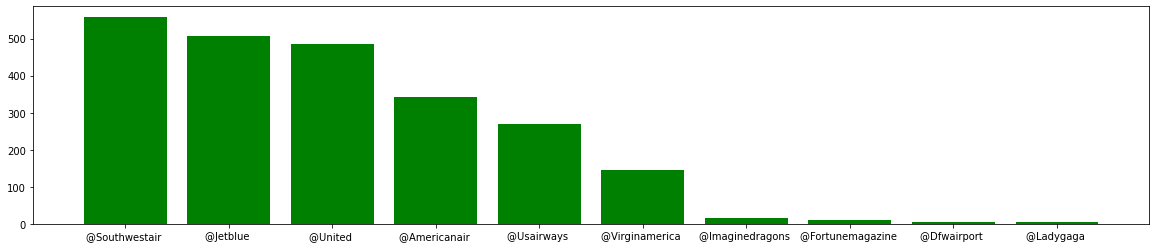

@Southwestair   :  559
@Jetblue   :  508
@United   :  484
@Americanair   :  342
@Usairways   :  270
@Virginamerica   :  145
@Imaginedragons   :  15
@Fortunemagazine   :  10
@Dfwairport   :  5
@Ladygaga   :  4


In [ ]:
# flight and their comment population from only positive sentiment comments

from collections import Counter
import re

flight_count = Counter()
df1 = df[df['sentiment'] == 'positive']
for txt in df1['text']:
  flight = re.findall("@[a-zA-Z]* ", txt)
  for f in flight:
    f = f.title()   ## it was observed a std format was not followed
    flight_count[f]+=1

print("From a text count of ",df1.shape[0]," lines")
print("Total number of flight names: ",len(flight_count))
print("TOP 10 mentions list")

import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
top_10_flights = dict(flight_count.most_common()[:10])
plt.bar(list(top_10_flights.keys()),list(top_10_flights.values()),color = 'g')
plt.show()

for key,value in flight_count.most_common()[:10]:  ## Sorted order
  print(key," : ",value)


From a text count of  9178  lines
Total number of flight names:  313
TOP 10 mentions list


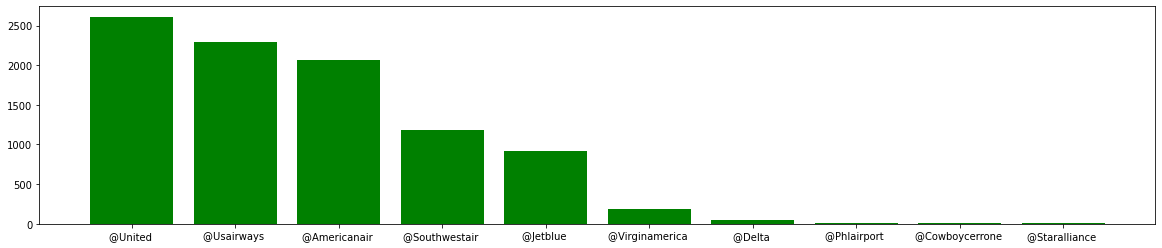

@United   :  2611
@Usairways   :  2289
@Americanair   :  2070
@Southwestair   :  1181
@Jetblue   :  923
@Virginamerica   :  188
@Delta   :  43
@Phlairport   :  13
@Cowboycerrone   :  6
@Staralliance   :  5


In [ ]:
# flight and their comment population from only negative sentiment comments

from collections import Counter
import re

flight_count = Counter()
df1 = df[df['sentiment'] == 'negative']
for txt in df1['text']:
  pattern=r"@\s[a-zA-Z]*" # this is to cover for places where there is a space next to @ example '@ '
  # Using re.sub() function to remove whitespaces
  txt = re.sub(pattern, "", txt)
  flight = re.findall("@[a-zA-Z]* ", txt)
  for f in flight:
    f = f.title()   ## it was observed a std format was not followed
    flight_count[f]+=1

print("From a text count of ",df1.shape[0]," lines")
print("Total number of flight names: ",len(flight_count))
print("TOP 10 mentions list")

import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
top_10_flights = dict(flight_count.most_common()[:10])
plt.bar(list(top_10_flights.keys()),list(top_10_flights.values()),color = 'g')
plt.show()

for key,value in flight_count.most_common()[:10]:  ## Sorted order
  print(key," : ",value)


In [ ]:
pos_results = set()
df1 = df[df['sentiment'] == 'positive']
df1['text'].str.lower().str.split().apply(pos_results.update)
print(pos_results)
print(len(pos_results))

{'glitches!', 'standby.', 'basic', 'reagan', '...', 'promotion!!!', 'integrate', 'claudia', '#dc', 'atl.', 'cover', "where's", 'important!', 'week', 'friendly', '#givethoseladiesraise', 'saturday!', 'now.', 'christmas', '#thanks!', 'faith', '"bluemanity"', 'grandma', '^jh', 'btv!!', 'stewardess', 'changed', 'atlanta', 'flightr.', 'media', 'cle', 'traveler,', 'photos!', 'things--the', 'red_heart', 'steal', 'lowest', 'lounges', 'one', 'baggage', 'center', '#wheelsup', 'aw', "@americanair's", 'installation', 'it.', 'life', 'releasing', 'non-stop', 'gettin', 'too!!', 'freezing', 'globe', 'flts', 'curious.', 'http://t.co/a0yosjhzmc', 'props', 'sxm!!!!!', 'getaway', 'detail.', '@abcnetwork', 'perhaps', 'ha!', '48hrs', 'worried', '12', 'soft', 'through!', 'complimentary', 'https://t.co/64kn6geep8', "here's", 're-check', 'passengers', 'in-flight', '41g.', '#singer', 'assist', 'relieved', 'tysvm', 'smiling_face_with_smiling_eyes', 'buy.', 'reply,', 'airways!!!', 'nature', 'memory', 'ap,', 'assi

In [ ]:
neg_results = set()
df1 = df[df['sentiment'] == 'negative']
df1['text'].str.lower().str.split().apply(neg_results.update)
print(neg_results)
print(len(neg_results))

{'hey!!', 'music,', 'slip', 'standby.', 'letter"', 'recruiter', 'lusaka', '#alsonodrinkcartcomingaround', '@sdfairport', 'canx', '#homewardbound', 'basic', 'convince', 'sc.', 'coma', 'profile', '776.20', '#freeconcert', 'lost,', 'platitudes', 'setting', 'btr', 'norm.', '@hdsportsguy', 'not???', '...', 'reagan', '#usairwaysssuck', 'suck!', 'describe', 'vouchers…any', 'misplaced.', 'pockets.', 'online...is', 'normally.', 'atl.', 'tokyo.', 'boston.', 'proceed', 'cover', 'work?#nogood', 'blue/blackish', '@americanair.', "where's", '&gt;1hr', 'week', 'blind.', '$2,000', 'ua7985', 'jerks', 'really?they', 'friendly', 'saturday!', 'hotels.', 'sabre', 'humor.', 'now.', 'iah...wow..just', 'cameras?', 'faith', 'faced', 'grandma', 'disappointment?', 'discnct.any', 'fyi:', 'yall)', 'translation:', 'ots', '#cameragear', 'mk', '@jordnnicole7', 'linking', 'stewardess', 'changed', 'atlanta', 'weatherless', 'shock.', 'flightr.', '25+', 'from,', 'media', 'minute.', 'cle', 'bos-sf', 'pointing', 'jetblue?'

In [ ]:
neg_distinct = neg_results.difference(pos_results)
print(len(neg_distinct))
pos_distinct = pos_results.difference(neg_results)
print(len(pos_distinct))

15713
3390


In [ ]:
print(len(df))

11541


In [ ]:
# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 4.7 MB/s 
     |████████████████████████████████| 7.6 MB 68.0 MB/s 
     |████████████████████████████████| 182 kB 77.9 MB/s 


In [ ]:
### Tokenizing and embedding layer (word-embedding)
from transformers import BertModel, BertTokenizer
import torch
import emoji
import re


  # model = BertModel.from_pretrained('bert-base-uncased')
  # tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
  # tokens = tokenizer.tokenize(sentence) # Tokenizining
  # tokens = ['[CLS]'] + tokens + ['[SEP]']
  # while(len(tokens)<100):
  #   tokens+=['[PAD]']
  # attention_mask = [1 if i!= '[PAD]' else 0 for i in tokens]
  # token_ids = tokenizer.convert_tokens_to_ids(tokens)
  # print("token_ids: ",token_ids ,type(token_ids))
  # token_ids = torch.tensor(token_ids).unsqueeze(0)
  # attention_mask = torch.tensor(attention_mask).unsqueeze(0)
  # output = model(token_ids, attention_mask = attention_mask)  # getting embedding 
  # return [output,attention_mask]


In [ ]:
import numpy as np
np.random.seed(112)
df_train, df_val, df_test = np.split(df.sample(frac=1, random_state=42), 
                                     [int(.8*len(df)), int(.9*len(df))])

In [ ]:
import torch
import numpy as np
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
labels = {'positive':1,
          'negative':2,}

class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):
        self.labels = [labels[label] for label in df['sentiment']]
        self.texts = [tokenizer(self.preprocess(text), padding='max_length', max_length = 512, truncation=True,return_tensors="pt") for text in df['text']]
    def preprocess(self,sentence):
      pattern=r"@\s[a-zA-Z]*" # this is to cover for places where there is a space next to @ example '@ '
      sentence = re.sub(pattern, "",emoji.demojize(sentence, delimiters=("", "")))
      return sentence
    
    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y


In [ ]:
from transformers import BertModel
from torch import nn
class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 3)
        self.relu = nn.ReLU()

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        final_layer = self.relu(linear_output)

        return final_layer

In [ ]:
from transformers import BertModel
from transformers import BertPreTrainedModel
from torch import nn
class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 3)
        self.relu = nn.ReLU()

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        final_layer = self.relu(linear_output)

        return final_layer

In [ ]:
from torch.optim import Adam
from tqdm import tqdm

def train(model, train_data, val_data, learning_rate, epochs):

    train, val = Dataset(train_data), Dataset(val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=2, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
    print(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr= learning_rate)

    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in tqdm(train_dataloader):

                train_label = train_label.to(device)
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)
                
                batch_loss = criterion(output, train_label.long())
                total_loss_train += batch_loss.item()
                
                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()
            
            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask)

                    batch_loss = criterion(output, val_label.long())
                    total_loss_val += batch_loss.item()
                    
                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc
            
            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} \
                | Train Accuracy: {total_acc_train / len(train_data): .3f} \
                | Val Loss: {total_loss_val / len(val_data): .3f} \
                | Val Accuracy: {total_acc_val / len(val_data): .3f}')
                  
EPOCHS = 5
model = BertClassifier()
LR = 1e-6
              
train(model, df_train, df_val, LR, EPOCHS)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


cuda


100%|██████████| 4616/4616 [16:08<00:00,  4.76it/s]


Epochs: 1 | Train Loss:  0.195                 | Train Accuracy:  0.868                 | Val Loss:  0.089                 | Val Accuracy:  0.938


100%|██████████| 4616/4616 [16:08<00:00,  4.77it/s]


Epochs: 2 | Train Loss:  0.064                 | Train Accuracy:  0.959                 | Val Loss:  0.082                 | Val Accuracy:  0.938


100%|██████████| 4616/4616 [16:08<00:00,  4.77it/s]


Epochs: 3 | Train Loss:  0.039                 | Train Accuracy:  0.977                 | Val Loss:  0.085                 | Val Accuracy:  0.944


100%|██████████| 4616/4616 [16:08<00:00,  4.77it/s]


Epochs: 4 | Train Loss:  0.019                 | Train Accuracy:  0.990                 | Val Loss:  0.105                 | Val Accuracy:  0.940


100%|██████████| 4616/4616 [16:08<00:00,  4.76it/s]


Epochs: 5 | Train Loss:  0.010                 | Train Accuracy:  0.996                 | Val Loss:  0.131                 | Val Accuracy:  0.938


In [ ]:
import torch 
torch.save(model.state_dict(), 'drive/MyDrive/inputs/airline_sentiment.pth')

In [ ]:
def evaluate(model, test_data):

    test = Dataset(test_data)

    test_dataloader = torch.utils.data.DataLoader(test, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    with torch.no_grad():

        for test_input, test_label in test_dataloader:

              test_label = test_label.to(device)
              mask = test_input['attention_mask'].to(device)
              input_id = test_input['input_ids'].squeeze(1).to(device)

              output = model(input_id, mask)

              acc = (output.argmax(dim=1) == test_label).sum().item()
              total_acc_test += acc
    
    print(f'Test Accuracy: {total_acc_test / len(test_data): .3f}')
    
evaluate(model, df_test)

Test Accuracy:  0.950
